In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_parquet("/home/brunovieira/Tamires_Experiments/Bases_de_Dados/structure_thickness.parquet")
df.age = [int(a) for a in df.age]
df.head()

,age,participant,structure,thickness
0,59,A00008326,OA,2.404729
1,59,A00008326,OA,2.637928
2,59,A00008326,OA,2.640083
3,59,A00008326,OA,2.556666
4,59,A00008326,OA,2.495451


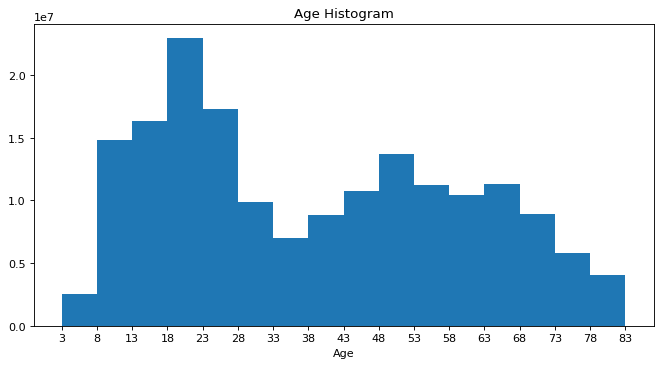

In [91]:
plt.figure(figsize=(10,5), dpi=80)
plt.hist(df.age, bins=range(3, 87, 5) )
plt.xticks(range(3, 87, 5))
plt.title('Age Histogram')
plt.xlabel('Age')
plt.show()

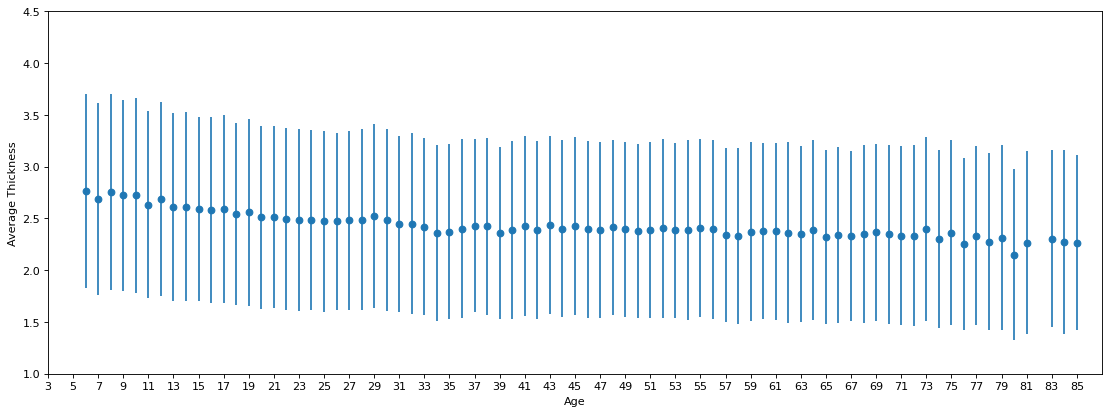

In [49]:
plt.figure(figsize=(17, 6), dpi=80)
plt.errorbar(df1.index, df1['thickness']['mean'], df1['thickness']['std'], linestyle='None', marker='o')
plt.gca().set_ylim([1, 4.5])
plt.gca().set_xlim([3, 87])
plt.xticks(range(3, 87, 2))
plt.xlabel('Age')
plt.ylabel('Average Thickness')
plt.show()

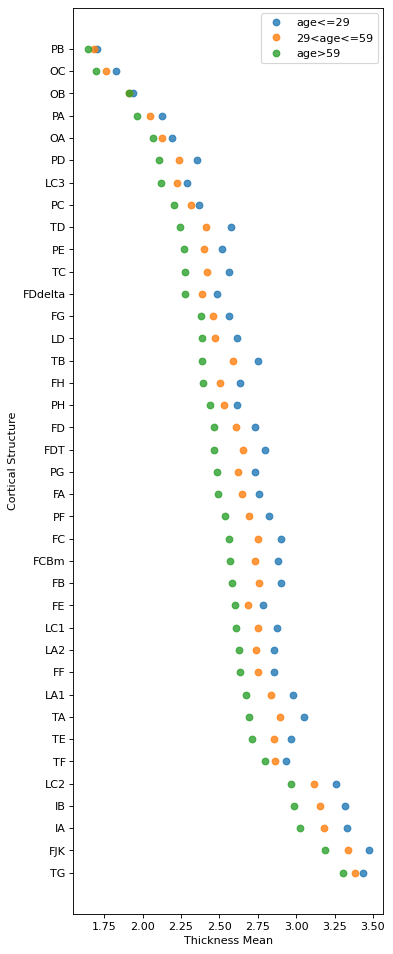

In [9]:
df1 = df.groupby('age').agg({'thickness': ['mean', 'std']})
df2 = df.groupby('structure').agg({'thickness': ['mean', 'std']})

df_a = df[df.age<=29]
df_b = df[(df.age>29)|(df.age<=59)]
df_c = df[df.age>59]

df_a2 = df_a.groupby('structure').mean()
df_b2 = df_b.groupby('structure').mean()
df_c2 = df_c.groupby('structure').mean()

index_order = list(df_c2.sort_values(by='thickness', ascending=False).index)
df_a2 = df_a2.reindex(index_order)
df_b2 = df_b2.reindex(index_order)
df_c2 = df_c2.reindex(index_order)

plt.figure(figsize=(5, 15), dpi=80)
plt.plot(df_a2.thickness, index_order, linestyle='None', marker='o', alpha=0.8)
plt.plot(df_b2.thickness, index_order, linestyle='None', marker='o', alpha=0.8)
plt.plot(df_c2.thickness, index_order , linestyle='None', marker='o', alpha=0.8)
plt.legend(['age<=29','29<age<=59','age>59'])
plt.ylabel('Cortical Structure')
plt.xlabel('Thickness Mean')
plt.show()

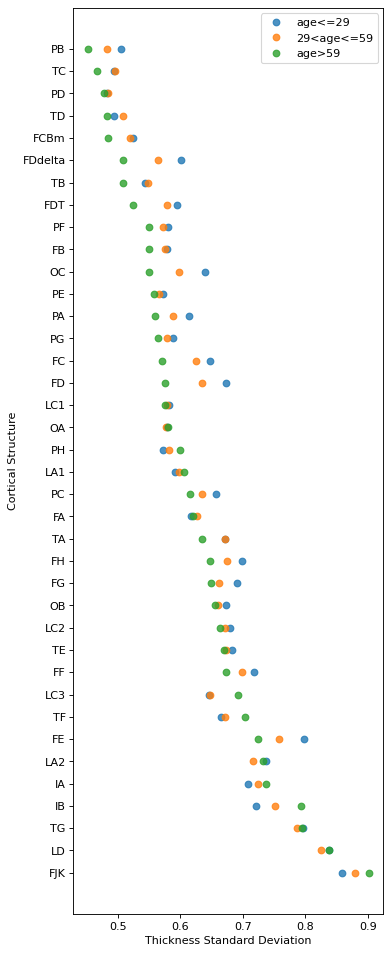

In [84]:
df1 = df.groupby('age').agg({'thickness': ['mean', 'std']})
df2 = df.groupby('structure').agg({'thickness': ['mean', 'std']})

df_a = df[df.age<=29]
df_b = df[(df.age>29)|(df.age<=59)]
df_c = df[df.age>59]

df_a2 = df_a.groupby('structure').std()
df_b2 = df_b.groupby('structure').std()
df_c2 = df_c.groupby('structure').std()

index_order = list(df_c2.sort_values(by='thickness', ascending=False).index)
df_a2 = df_a2.reindex(index_order)
df_b2 = df_b2.reindex(index_order)
df_c2 = df_c2.reindex(index_order)

plt.figure(figsize=(5, 15), dpi=80)
plt.plot(df_a2.thickness, index_order, linestyle='None', marker='o', alpha=0.8)
plt.plot(df_b2.thickness, index_order, linestyle='None', marker='o', alpha=0.8)
plt.plot(df_c2.thickness, index_order , linestyle='None', marker='o', alpha=0.8)
plt.legend(['age<=29','29<age<=59','age>59'])
plt.ylabel('Cortical Structure')
plt.xlabel('Thickness Standard Deviation')
plt.show()

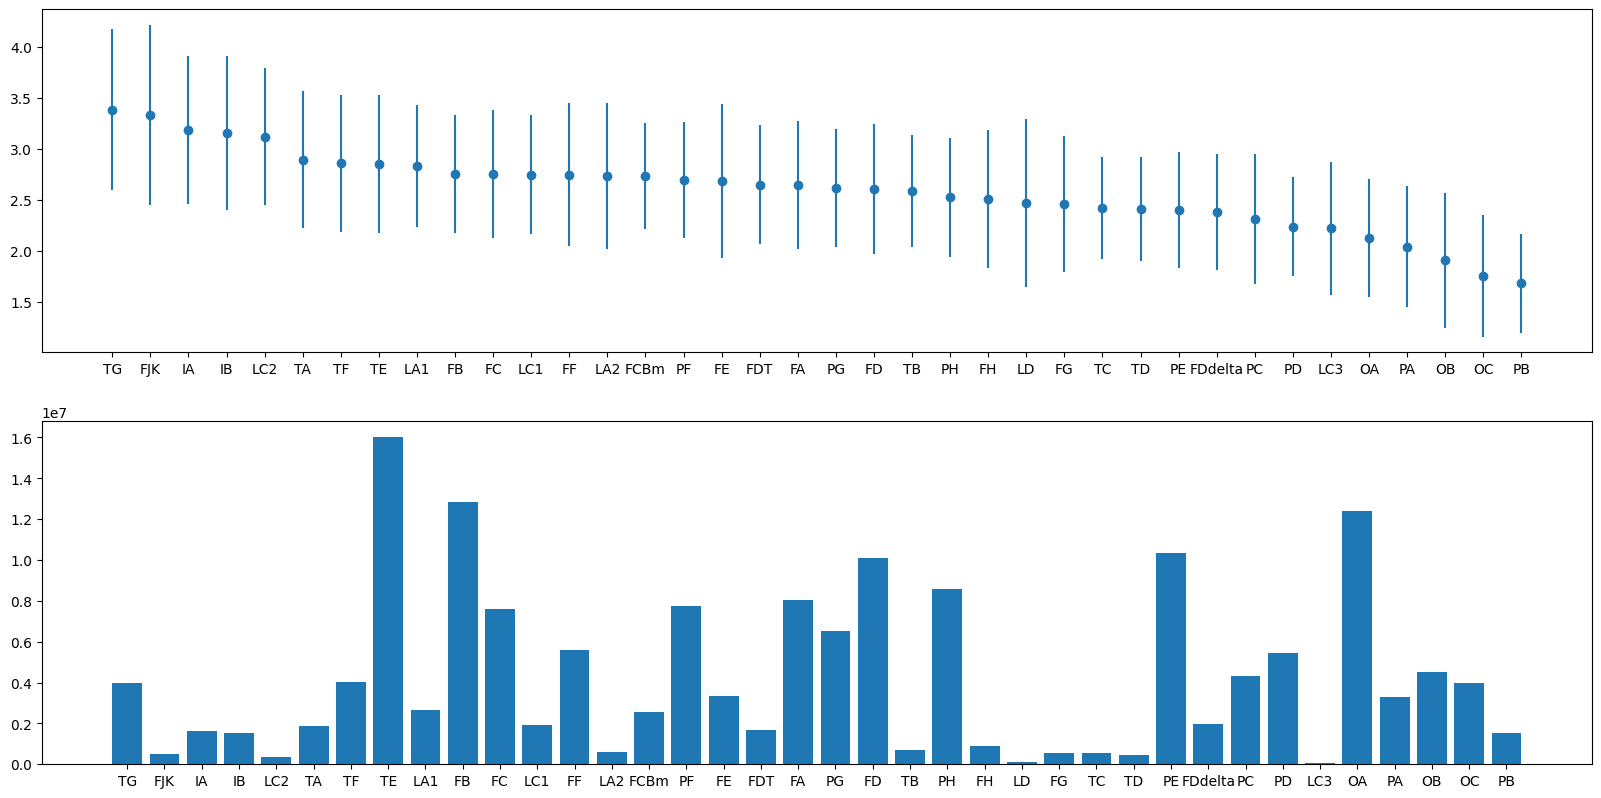

In [116]:
fig, ax = plt.subplots(2,1, figsize=(20,10), dpi=100)       
ax[1].bar(df3.reindex(index_order).index, df3.reindex(index_order).age)
ax[0].errorbar(df2.index, 
             df2['thickness']['mean'], 
             df2['thickness']['std'], 
             linestyle='None', 
             marker='o')
ax[0].set_title('col')
plt.show()

/tmp/ipykernel_13713/243530785.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[8,8])


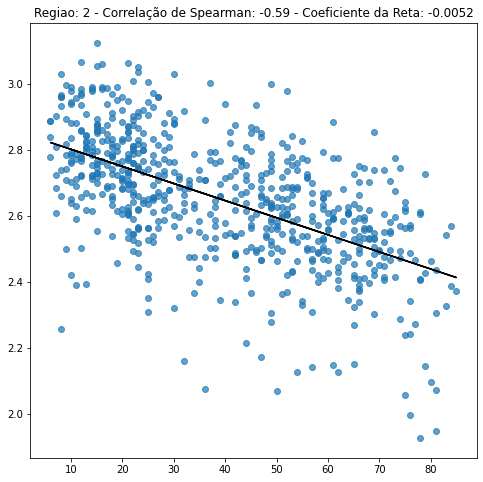

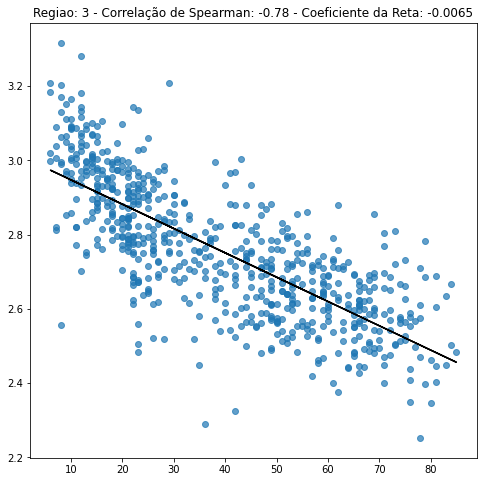

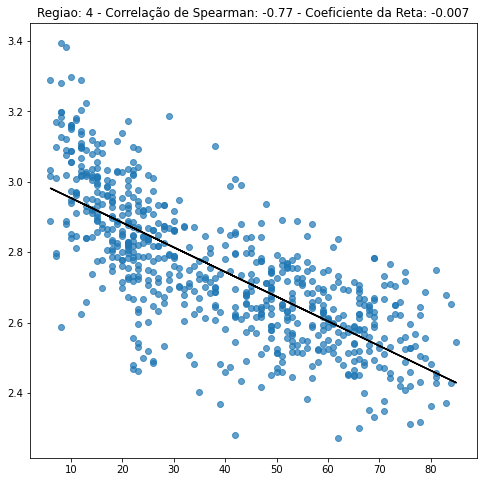

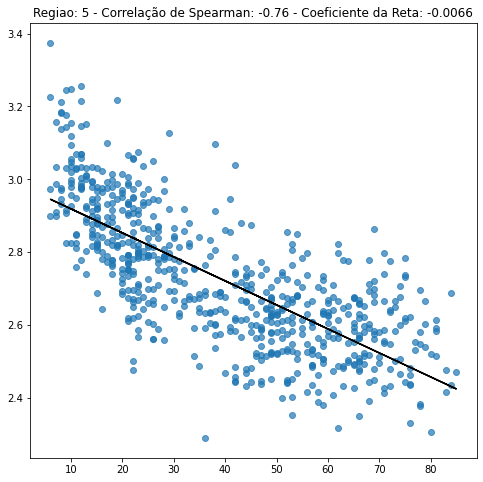

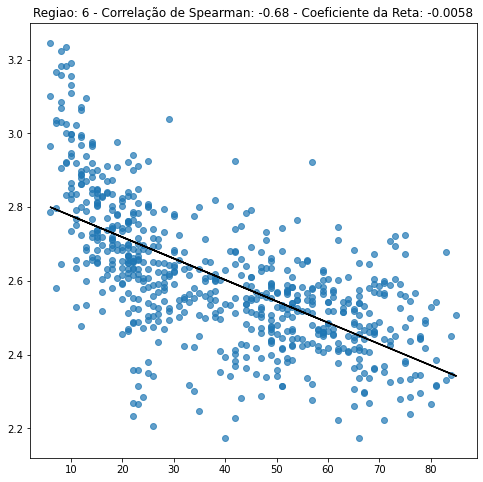

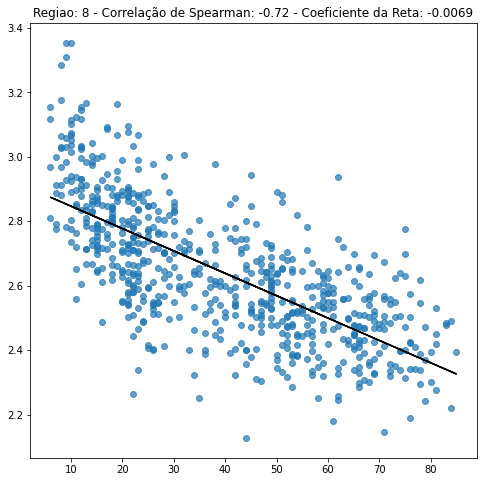

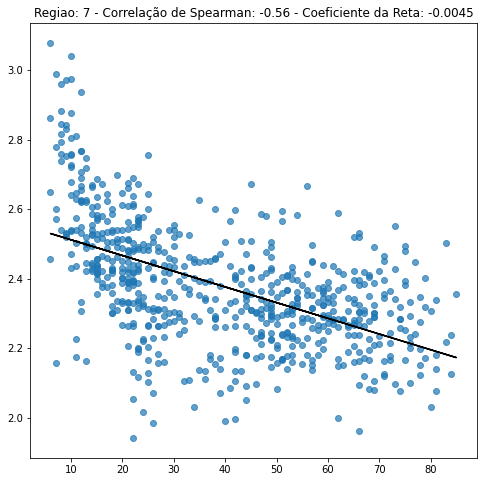

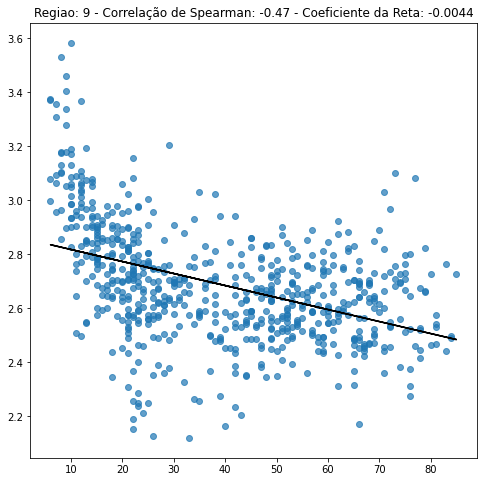

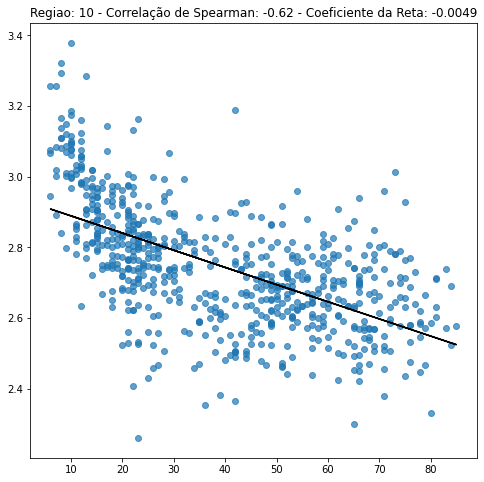

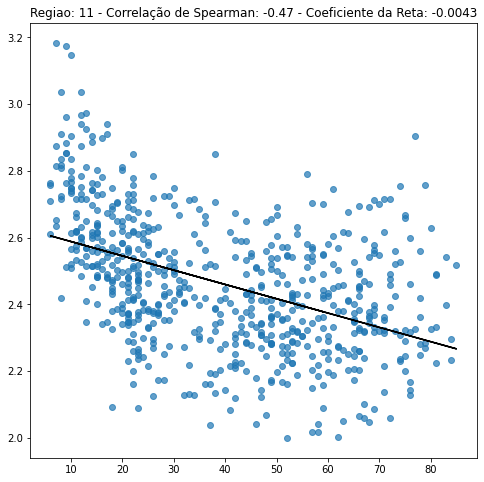

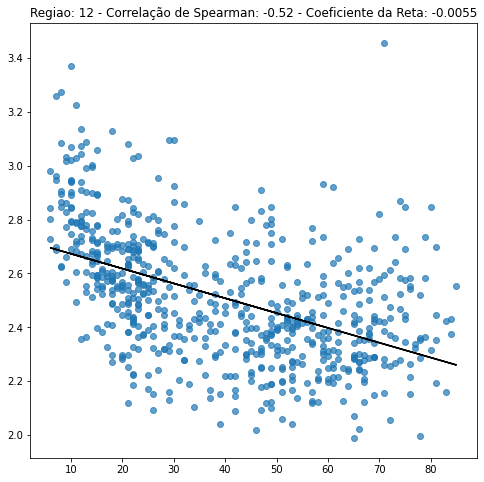

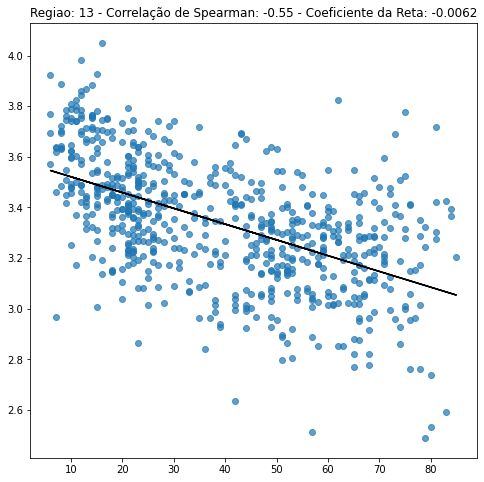

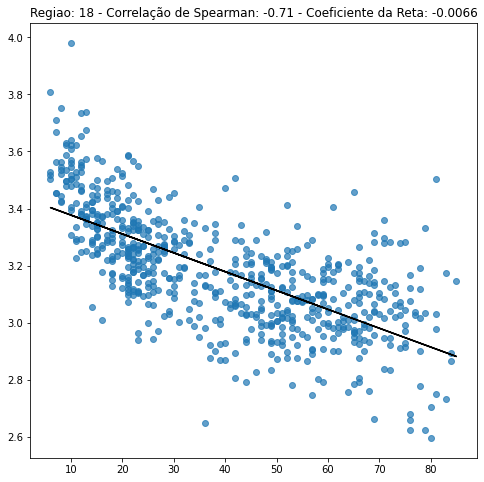

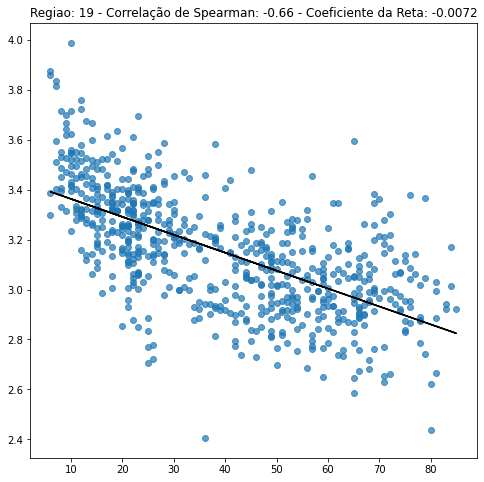

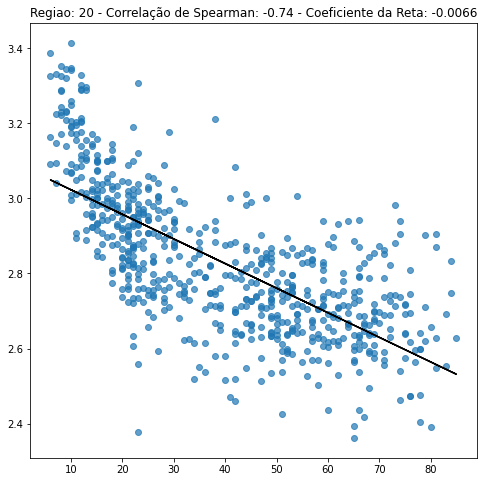

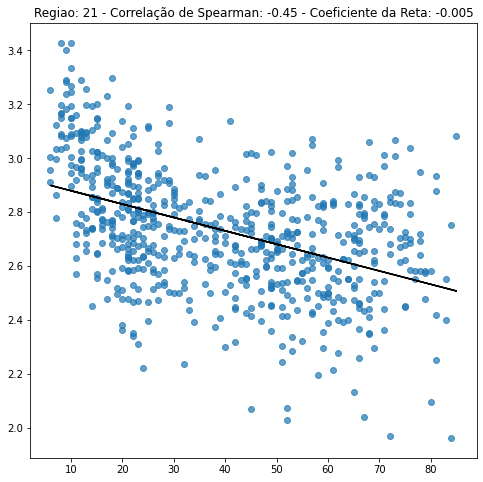

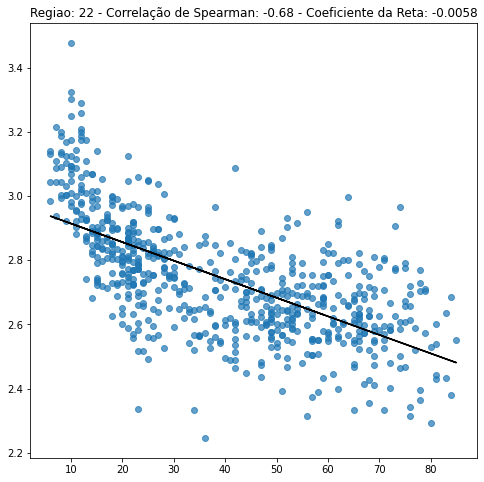

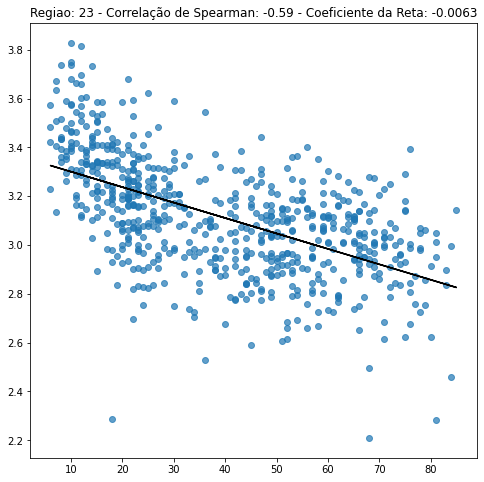

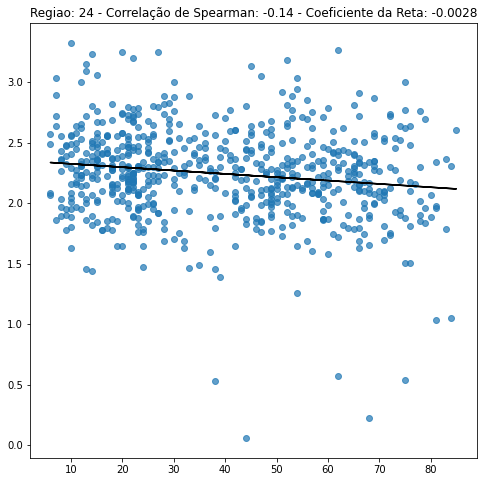

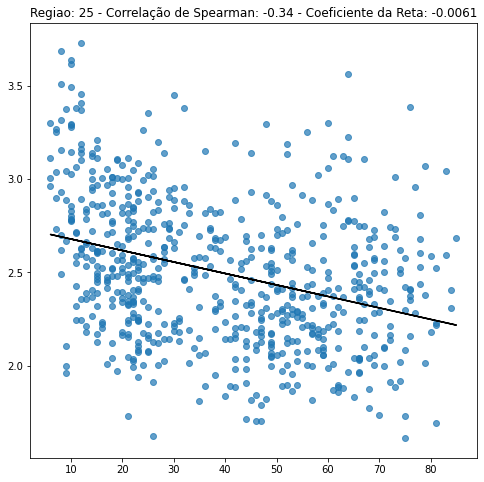

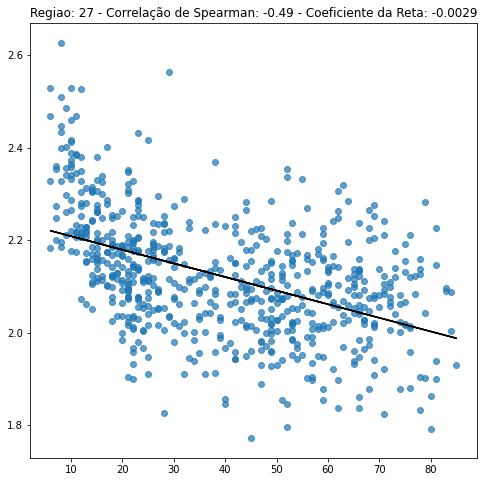

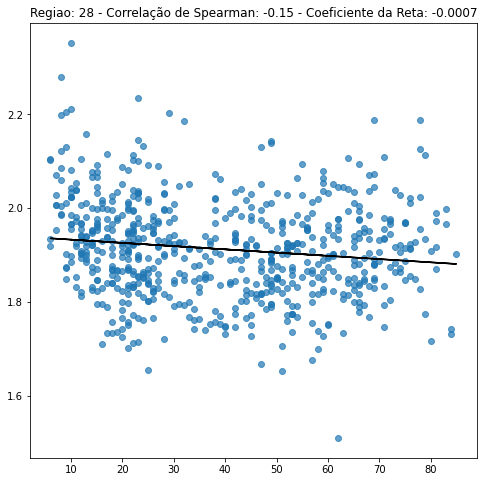

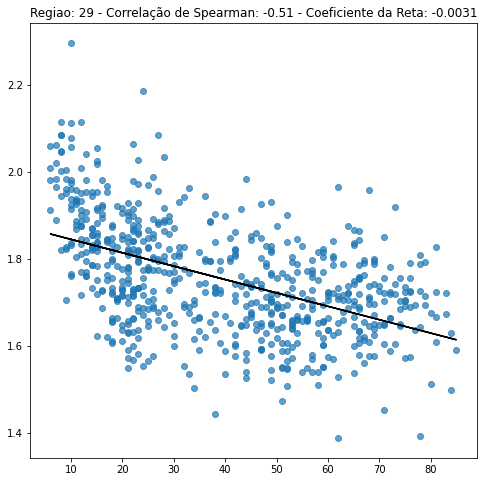

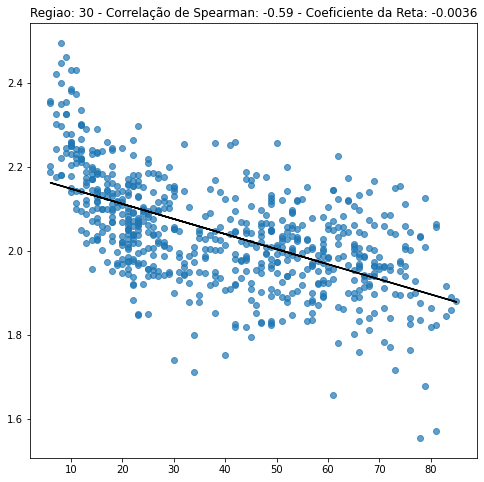

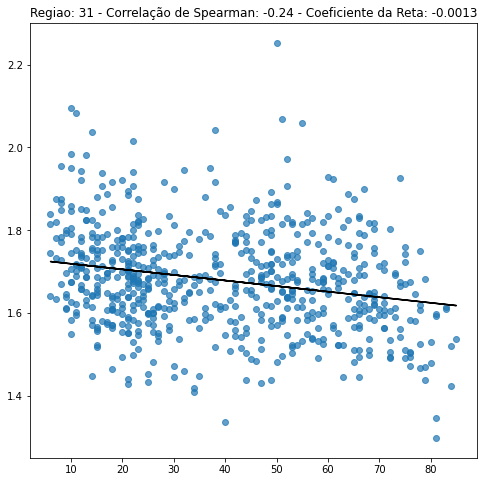

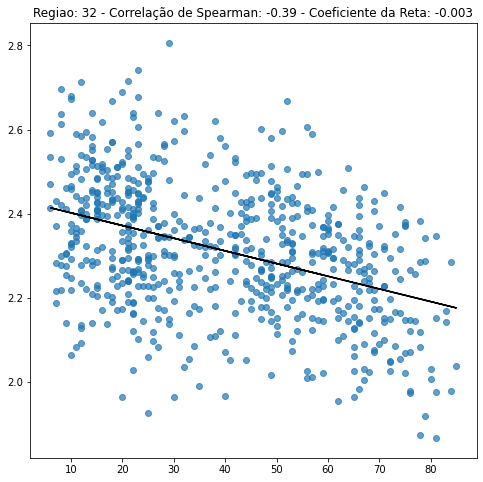

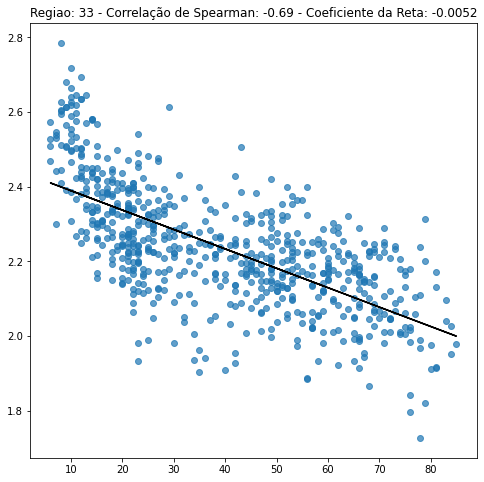

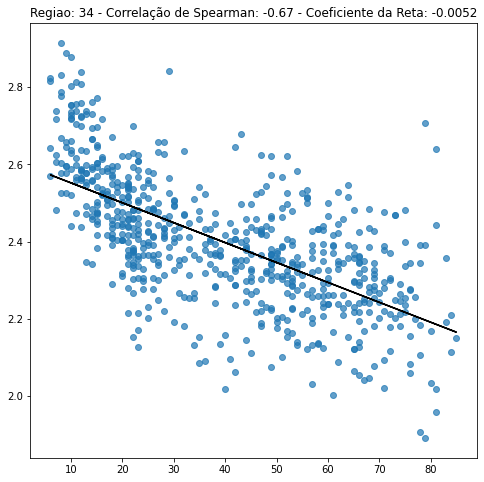

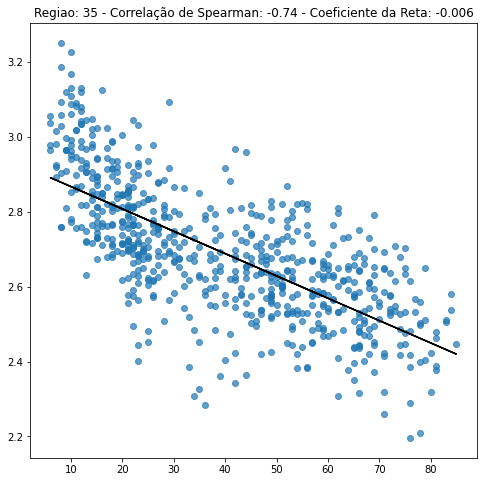

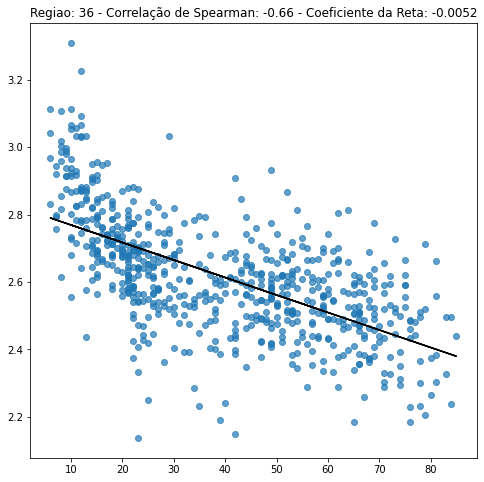

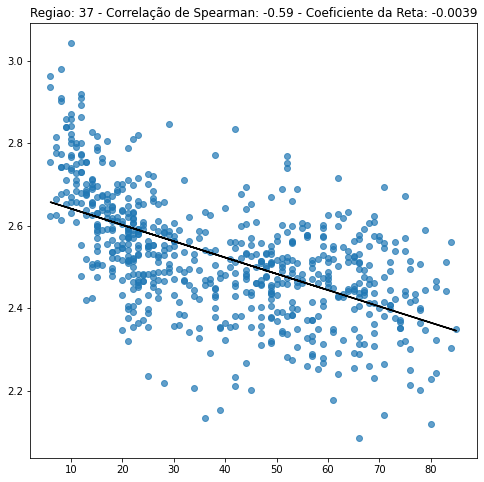

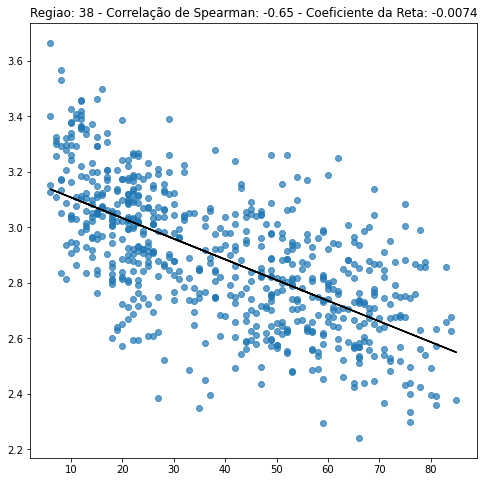

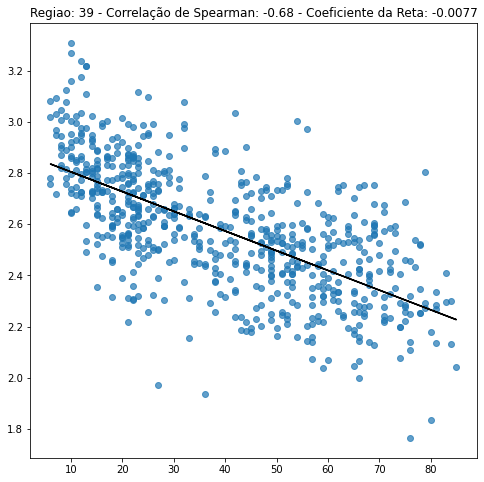

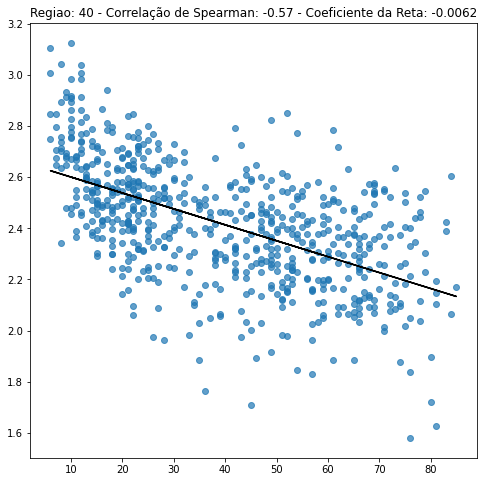

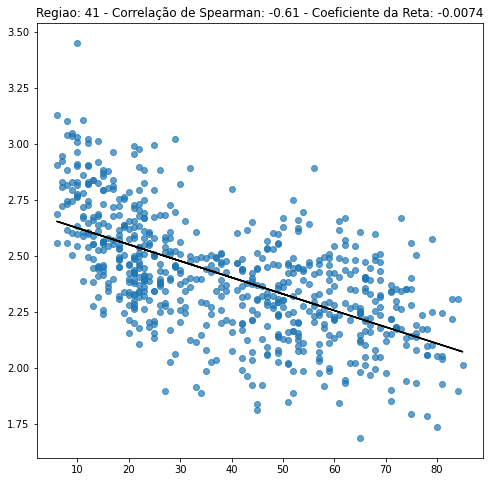

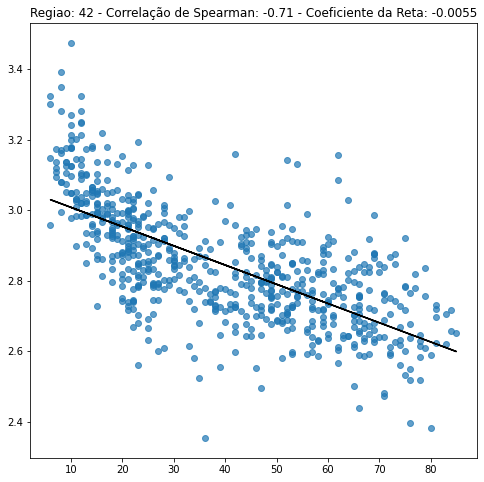

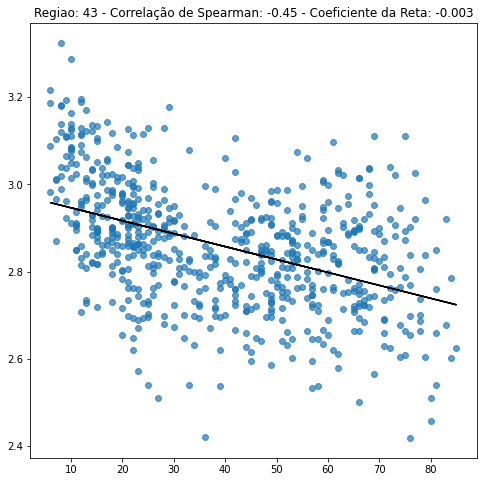

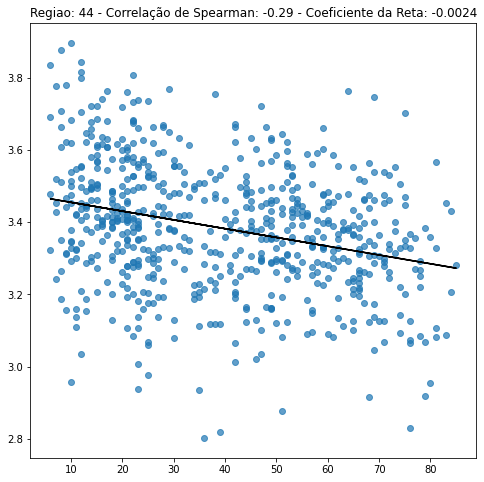

In [10]:
path = "/home/brunovieira/Tamires_Experiments/Bases_de_Dados/MRI_Data_Areas_665.csv"
Xy_groupby1 = pd.read_csv(path)

taxa_anual = []
cor = []
for structure in Xy_groupby1.atlasEcono.unique():
    
    age = Xy_groupby1[Xy_groupby1.atlasEcono == structure].age
    thickness = Xy_groupby1[Xy_groupby1.atlasEcono == structure].thickness
    m, b = np.polyfit(age, thickness, 1)
    
    plt.figure(figsize=[8,8])
    plt.plot(age, m*age + b, 'k')
    plt.title('Structure: '+str(int(structure)) +
              ' - CorrSpearman: ' + str(round(age.corr(thickness, method='spearman'),2)) +
              ' - AgularCoef: ' + str(round(m ,4)))
    plt.scatter(age,thickness, alpha=0.7)
    
    taxa_anual.append(m)
    cor.append(age.corr(thickness, method='spearman'))

obs.: essa taxa daqui é uma taxa media, nao leva enconta se um individuo tem uma taxa de afinamento maior ou menor que o outro, mas isso so consguiriamos com dados longitudinais ou gerados por modelos

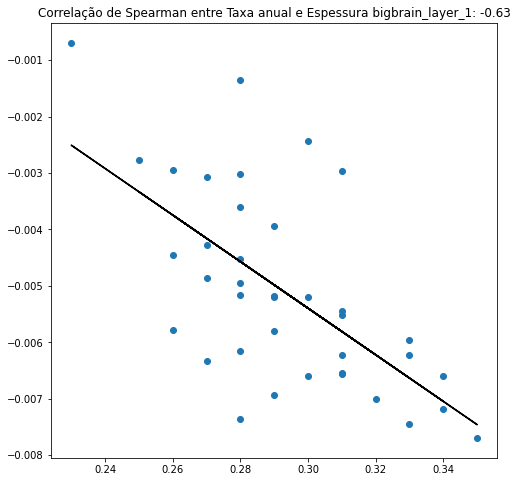

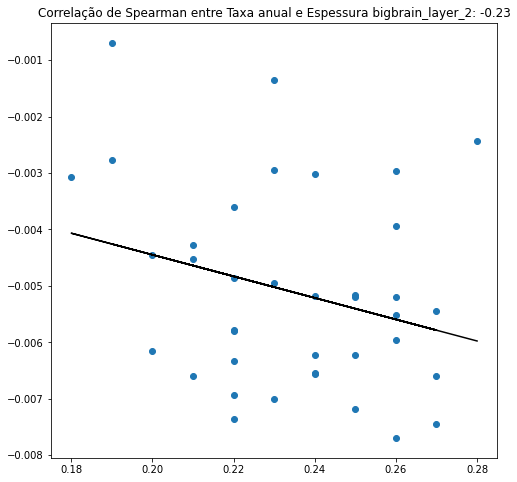

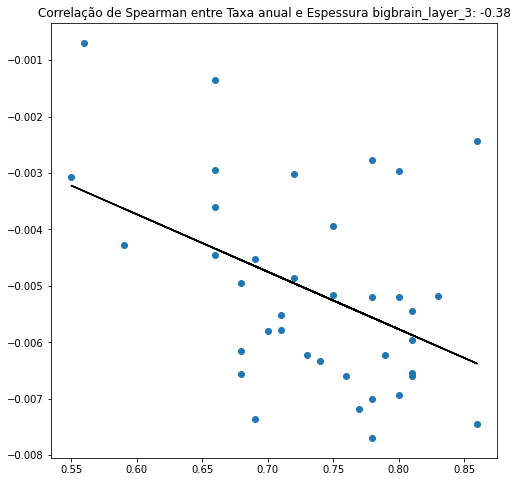

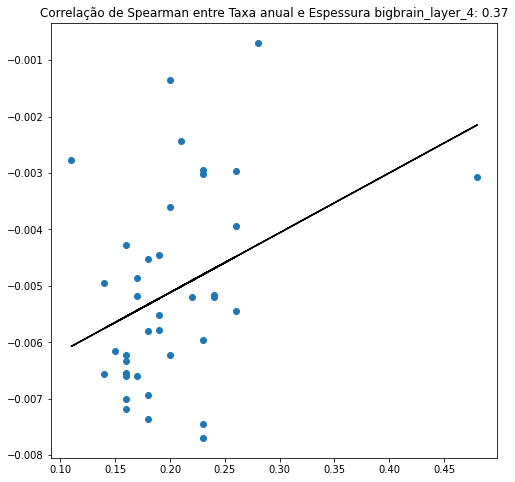

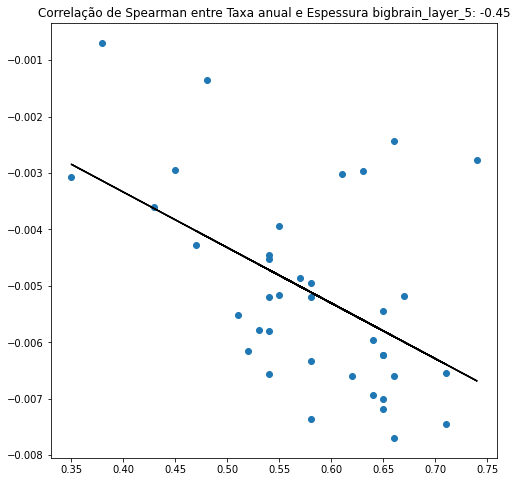

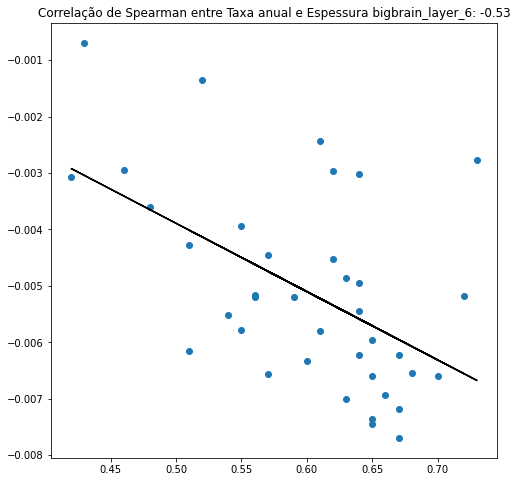

In [13]:
bb = pd.read_excel('/home/brunovieira/Tamires_Experiments/Bases_de_Dados/BigBrain.xlsx', index_col=0)
df = [pd.Series(taxa_anual), pd.Series(Xy_groupby1.atlasEcono.unique())]
df = pd.concat(df, axis=1)
df = df.rename(columns={0: "taxaAnual", 1: "atlasEcono"})
df = df.set_index("atlasEcono")
df_join = df.join(bb)
for i in ['bigbrain_layer_1','bigbrain_layer_2','bigbrain_layer_3','bigbrain_layer_4','bigbrain_layer_5','bigbrain_layer_6']:
    test = df_join[i]
    m, b = np.polyfit(test, df_join.taxaAnual, 1)
    plt.figure(figsize=[8,8])
    plt.plot(test, m*test + b, 'k')
    plt.title('Correlação de Spearman entre Taxa anual e Espessura '+i+': ' 
              + str(round(test.corr(df_join.taxaAnual, method='spearman'),2)))
    plt.scatter(test, df_join.taxaAnual)